256 256


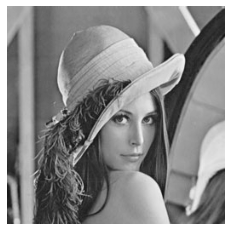

(256, 256, 3)


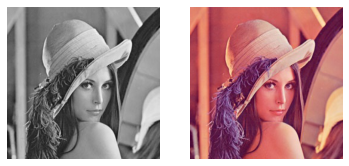

In [4]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy import ndimage
import imageio # pip install imageio

lena = imread('./영상샘플/lena_256.bmp')
row, col = lena.shape
print(row,col)

plt.imshow(lena), plt.axis('off')
plt.gray()
plt.show()

lena_color = imread('./영상샘플/lenacolor.jpg')
print(lena_color.shape) # RGB 입니다. R256 G256 B3

plt.subplot(121), plt.imshow(lena), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_color), plt.axis('off')
plt.show()

# 다른이름으로 저장
imageio.imwrite('./영상샘플/lena_copy.bmp', lena)

(<matplotlib.image.AxesImage at 0x241b4879fa0>, (-0.5, 1023.5, 767.5, -0.5))

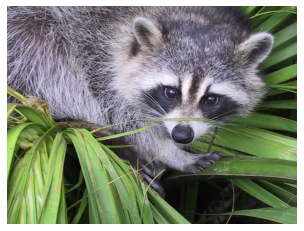

In [31]:
f = misc.face()
plt.imshow(f), plt.axis('off')
# 내장사진 존재

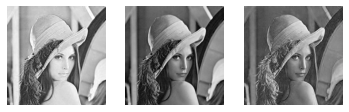

In [40]:
lena = imread('./영상샘플/lena_256.bmp')
lena_color = imread('./영상샘플/lenacolor.jpg')

plt.subplot(131), plt.imshow(lena_color[:,:,0]), plt.axis('off')
plt.subplot(132), plt.imshow(lena_color[:,:,1]), plt.axis('off')
plt.subplot(133), plt.imshow(lena_color[:,:,2]), plt.axis('off')
plt.show()

23.11.20

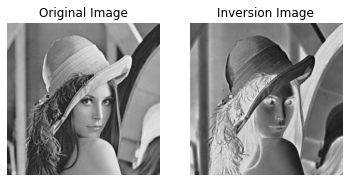

In [6]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy import ndimage
import imageio 

lena = imread('./영상샘플/lena_256.bmp')

# Imagne inversion : 영상반전
lena_inversion = 255-lena
plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_inversion), plt.title('Inversion Image'), plt.gray(), plt.axis('off')
plt.show()

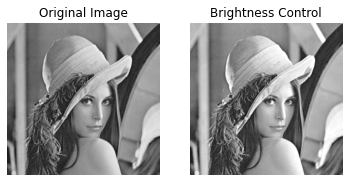

In [9]:
# Image Brightness Control : 영상밝기 조절

n = 40
# lena_BC = lena + n 오버플로우 발생.

lena_BC = np.where((255-lena)<n, 255, lena+n)
plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_BC), plt.title('Brightness Control'), plt.gray(), plt.axis('off')
plt.show() 

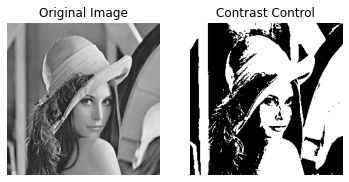

In [19]:
# 다. 영상의 명암비 조절

alpha = -1
# alpha = 1

lena_CC = lena + (lena-128)*alpha
plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_CC), plt.title('Contrast Control'), plt.gray(), plt.axis('off')
plt.show() 

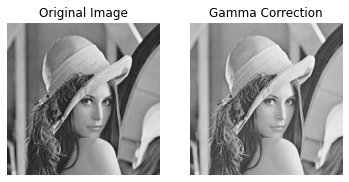

In [22]:
# Image gamma correction 감마 보정 

Gamma = 1.5
lena_GC = pow(lena/255, 1/Gamma)* 255
plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_GC), plt.title('Gamma Correction'), plt.gray(), plt.axis('off')
plt.show() 

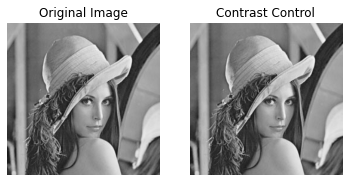

In [27]:
# 다. 영상의 명암비 조절 - 요오

alpha = 0.8
# alpha = 1

# 255의 절반인 128 보다, 영상의 실제 평균값을 넣는다.

lena_CC = lena + (lena-np.mean(lena)??)*alpha
plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_CC), plt.title('Contrast Control'), plt.gray(), plt.axis('off')
plt.show() 

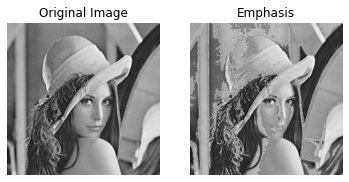

In [38]:
# 마. 중간 강조
lena = imread('./영상샘플/lena_256.bmp')
row, col = lena.shape

lena_new = np.ndarray(shape = (row, col), dtype=np.uint8)
n = 50
N1 = 100
N2 = 130

for y in range(row):
    for x in range(col):
        value = lena[x,y]
        if value > N1 and value< N2 : 
            lena_new[x,y] = value+n
        else:
            lena_new[x,y] = value
            
# lena_new = np.where(lena<N1, lena , np.where(lena>N2, lena, lena+n))

plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_new), plt.title('Emphasis'), plt.gray(), plt.axis('off')
plt.show() 

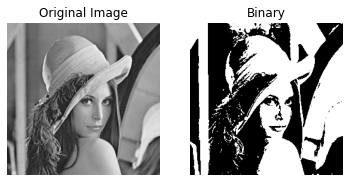

In [43]:
# 이진화

lena_binary = np.ndarray(shape = (row, col), dtype=np.uint8)
n = 128

for y in range(row):
    for x in range(col):
        value = lena[x,y]
        if value >n: 
            lena_binary[x,y] = 255
        else:
            lena_binary[x,y] = 0
            
# lena_binary = np.where(lena>n, 255, 0)

plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_binary), plt.title('Binary'), plt.gray(), plt.axis('off')
plt.show() 


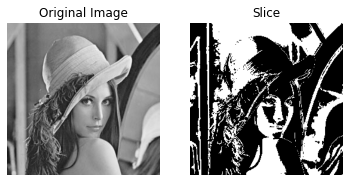

In [55]:
# 사. 슬라이스

lena_slice = np.ndarray(shape = (row, col), dtype=np.uint8)
n = 128
N1 = 100
N2 = 150

for y in range(row):
    for x in range(col):
        value = lena[x,y]
        if  value > N1 and value< N2 : 
            lena_binary[x,y] = 255
        else:
            lena_binary[x,y] = 0
             
lena_slice = np.where(lena<N1, 0, np.where(lena>N2, 0, 255))

plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_slice), plt.title('Slice'), plt.gray(), plt.axis('off')
plt.show() 


In [1]:
# 아. 등명도선

lena_new = np.ndarray(shape = (row, col), dtype=np.uint8)
n = 128
N1 = 100
N2 = 150

for y in range(row):
    for x in range(col):
        value = lena[x,y]
        if  value > N1 and value< N2 : 
            lena_binary[x,y] = 255
        else:
            lena_binary[x,y] = 0
            
    
# lena_new = np.where(lena<N1, 255, np.where(lena>N2, lena, 0))

plt.subplot(121), plt.imshow(lena), plt.title('Original Image'), plt.gray(), plt.axis('off')
plt.subplot(122), plt.imshow(lena_binary), plt.title('Slice'), plt.gray(), plt.axis('off')
plt.show() 


NameError: name 'np' is not defined

23.11.22

In [2]:
bin8 = lambda x : ''.join(reversed( [str((x >> i) & 1) for i in range(8)] ) )

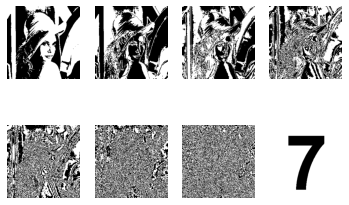

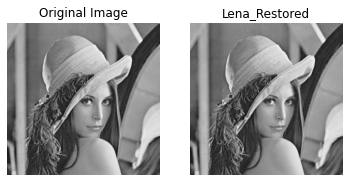

In [28]:
def BitPlane_Slice(value):
    c = np.zeros(8)
    n = 7
    bits = bin8(value)
    
    for i in range(8):
        p = pow(2, n)
        c[i] = p * int(bits[i])
        n = n - 1
        
    return c

lena = imread('./영상샘플/lena_256.bmp')
copyright = imread('./영상샘플/seven.bmp')

row, col = lena.shape
NumOfImage = 8
Image_Bitplanes = np.ndarray(shape=(NumOfImage, row, col), dtype = np.uint8)
Image_restore = np.zeros(shape=(row,col), dtype=np.uint8)

for y in range(col):
    for x in range(row):
        value = lena[y,x]
        c = BitPlane_Slice(value)
        
        for i in range(NumOfImage):
            Image_Bitplanes[i,y,x] = c[i]
Image_Bitplanes[7, :, :] = copyright
            
for i in range(NumOfImage):
    img = Image_Bitplanes[i,:,:]
    Image_restore += img
    plt.subplot(2,4,i+1), plt.imshow(img), plt.gray(), plt.axis('off')
plt.show()

plt.subplot(121), plt.imshow(lena), plt.gray(), plt.axis('off')
plt.title('Original Image')
plt.subplot(122), plt.imshow(Image_restore), plt.gray(), plt.axis('off')
plt.title('Lena_Restored')
plt.show()